In [369]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from google.colab import drive
from copy import deepcopy
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [370]:
df = pd.read_csv('/content/drive/MyDrive/WineQT.csv')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,2
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,3
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1592
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1593
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1594
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1595


In [371]:
df.shape

(1143, 13)

In [372]:
df = df.drop_duplicates()
df.shape

(1143, 13)

In [373]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'Id'],
      dtype='object')

In [374]:
print('number of unique values in col :')
for c in df.columns:
    unique = len(df[c].unique())
    if (unique <= 20):
        print('-----> CATEGORICAL -----> ', end='')
    print(c,'= ', unique)

number of unique values in col :
fixed acidity =  91
volatile acidity =  135
citric acid =  77
residual sugar =  80
chlorides =  131
free sulfur dioxide =  53
total sulfur dioxide =  138
density =  388
pH =  87
sulphates =  89
alcohol =  61
-----> CATEGORICAL -----> quality =  6
Id =  1143


In [375]:
df.quality.unique()

array([5, 6, 7, 4, 8, 3])

In [376]:
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

In [377]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


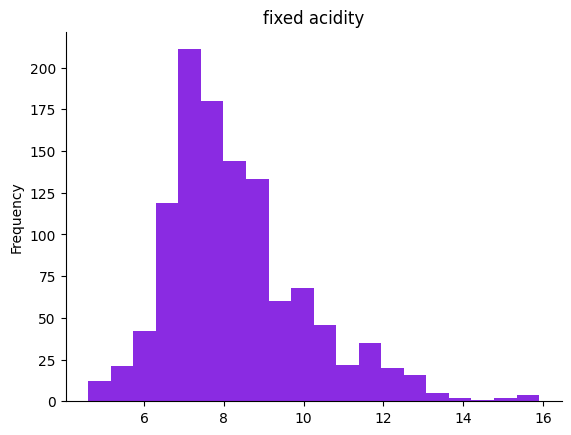

In [378]:
# @title fixed acidity
df['fixed acidity'].plot(kind='hist', bins=20, title='fixed acidity', color='blueviolet')
plt.gca().spines[['top', 'right',]].set_visible(False)

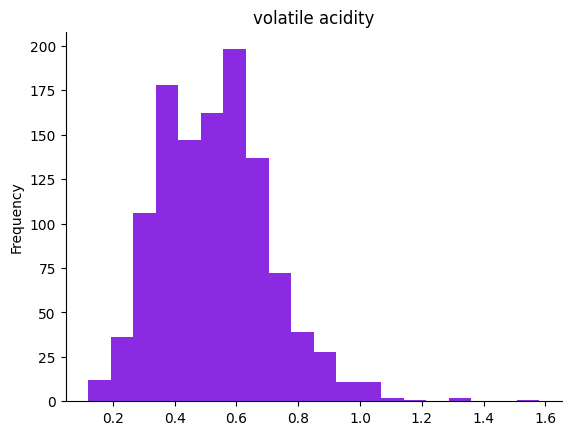

In [379]:
# @title volatile acidity
df['volatile acidity'].plot(kind='hist', bins=20, title='volatile acidity', color='blueviolet')
plt.gca().spines[['top', 'right',]].set_visible(False)

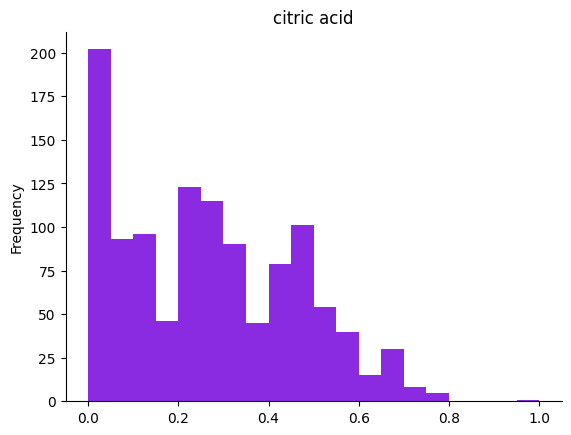

In [380]:
# @title citric acid
df['citric acid'].plot(kind='hist', bins=20, title='citric acid', color='blueviolet')
plt.gca().spines[['top', 'right',]].set_visible(False)

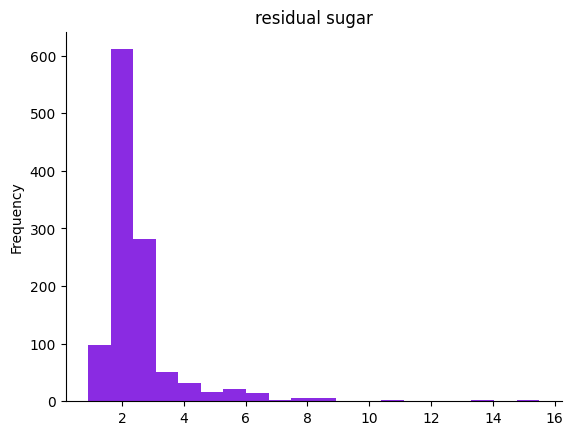

In [381]:
# @title residual sugar
df['residual sugar'].plot(kind='hist', bins=20, title='residual sugar', color='blueviolet')
plt.gca().spines[['top', 'right',]].set_visible(False)

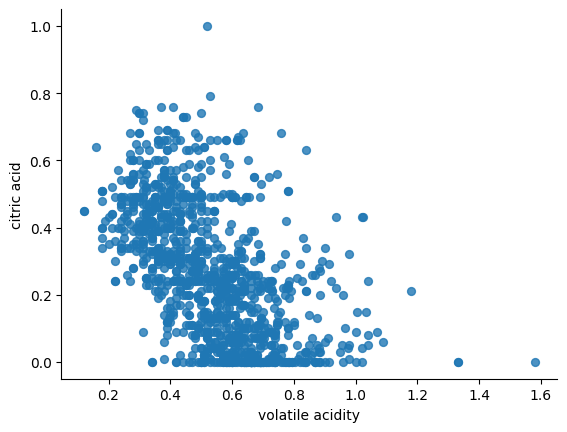

In [382]:
# @title volatile acidity vs citric acid
df.plot(kind='scatter', x='volatile acidity', y='citric acid', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

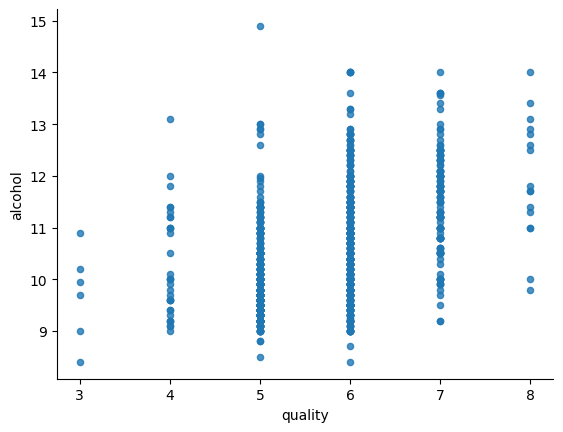

In [383]:
# @title alcohol vs quality
df.plot(kind='scatter', y='alcohol', x='quality', alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [384]:
df.drop(columns=['Id'], axis=1, inplace=True)
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6


In [385]:
# @title train test split
msk = np.random.rand(len(df)) < 0.8
train = df[msk]
test = df[~msk]

while((len(train)/(len(train)+len(test))<0.8)or(len(train)/(len(train)+len(test))>0.81)):
  msk = np.random.rand(len(df)) < 0.8

  train = df[msk]
  test = df[~msk]

In [386]:
len(train)/(len(train)+len(test))

0.8083989501312336

In [387]:
# @title standardization
cols_to_standardize =['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']
for column in cols_to_standardize:
  train[column] = (train[column] - train[column].mean()) / train[column].std()
  test[column] = (test[column] - test[column].mean()) / test[column].std()

<ipython-input-387-121ee8faa5e1>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train[column] = (train[column] - train[column].mean()) / train[column].std()
<ipython-input-387-121ee8faa5e1>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test[column] = (test[column] - test[column].mean()) / test[column].std()


# MLP

In [388]:
class linear:
    def __init__(self, input_dim, out_dim):
      self.input_dim = input_dim
      self.output_dim = out_dim

# He initialization
      self.weights = np.random.randn(input_dim, out_dim) * (np.sqrt(2/((input_dim) + (out_dim)))) #-> w{i}
      self.bias = np.zeros(out_dim)   #-----------------------------------------------------------------------------------> b{i}
      self.input_buffer = np.zeros(input_dim) # ----------------------------------------------------------> h{i}

      self.weight_gradients = np.zeros((input_dim, out_dim))   # dL/dW{i}
      self.bias_gradient = 0                                 # dL/db{i}
      self.activation_gradients = np.zeros(input_dim)        # dL/dh{i}

    def forward(self, x):
      self.input_buffer = deepcopy(x) # input_buffer: B*input_dim
      return np.dot(x, self.weights) + self.bias

    def backward(self, backproped_gradient):
      # backproped_gradient : B*out_dim
      # input = dL/dh{i+1}
       #                  input_dim*B    B*out_dim
      w_g = np.dot(np.transpose(self.input_buffer), backproped_gradient) // self.input_buffer.shape[0] # input_dim*out_dim
      b_g = backproped_gradient.mean(axis=0)  # 1*out_dim
      a_g = np.dot(backproped_gradient, np.transpose(self.weights)) #B*input_dim

      self.weight_gradients = w_g
      self.bias_gradient = b_g
      self.activation_gradients = a_g
      return a_g

In [389]:
class RELU:
    def __init__(self, input_dim):
      self.input_dim = input_dim

      self.input_buffer = np.zeros(input_dim) # h{i}
      self.relu_prime_of_activations = np.zeros(input_dim)  # relu'(h{i})
      self.activation_gradients = np.zeros(input_dim)   # dL/dh{i}

    def forward(self, x):
      self.input_buffer = deepcopy(x) # input_buffer: B*input_dim
      mask = (x >= 0)
      res = np.where(mask, x, 0)
      return res

    def backward(self, backproped_gradient):
      # backproped_gradient : B*input_dim
      # input = dL/dh{i+1}
      mask = (self.input_buffer >= 0)
      relu_prime = np.where(mask, 1, 0)
      #             B*input_dim    B*input_dim
      a_g = (backproped_gradient * relu_prime) # B*input_dim

      self.activation_gradients = a_g
      return a_g

In [390]:
class network:
    def __init__(self, input_dim, hid_dim, out_dim, num_layers, target = None):
      self.layers = [linear(input_dim, hid_dim)]
      for i in range(num_layers-1):
        l = linear(hid_dim, hid_dim)
        self.layers.append(l)
        act = RELU(hid_dim)
        self.layers.append(act)
      self.layers.append(linear(hid_dim, out_dim))

      self.output = None
      self.out_dim = out_dim
      self.hid_dim = hid_dim
      self.dL_do = np.zeros(self.out_dim)
      self.target = target.values

    def forward(self,x):
      h = x
      for l in (self.layers):
        h = l.forward(h)
      self.output = h
      return h

    def backward(self):

      self.dL_do = 2 * (np.reshape(self.output, (-1,1))- np.reshape(self.target, (-1,1)))   # B*out_dim

      dL_dh = self.layers[-1].backward(self.dL_do)
      for i in range(len(self.layers)-2,0,-1):
        dL_dh = self.layers[i].backward(dL_dh)

      return dL_dh

In [391]:
def optimizer(network, lr):

  for i in range(len(network.layers)-1, 0, -1):
    if(isinstance(network.layers[i], linear)):
      network.layers[i].weights -= lr*network.layers[i].weight_gradients
      # -= lr * dL/dW{i}
      network.layers[i].bias -= lr*network.layers[i].bias_gradient
      # -= lr * dL/db{i}

In [392]:
len(train.columns)

12

In [393]:
train_x = train.drop('quality', axis=1)

train_y = train['quality']

In [394]:
def mean_squared_error(y_real, y_pred):
    mse = np.mean((y_real - y_pred) ** 2)
    mse_rounded = np.round(mse)

    return mse_rounded

In [395]:
learning_rates = np.geomspace(1e-8, 10, num=15).tolist()

In [396]:
def plottt(rate):
  nn = network(input_dim=len(train_x.columns) , hid_dim= 20, out_dim =1, num_layers=2, target=train_y)

  # train
  losses=[]
  for epoch in range(20):
      pred = nn.forward(train_x)
      pred = pred.reshape(len(train_y))
      losses.append(mean_squared_error(train_y, pred))

      nn.backward()

      optimizer(nn, rate)

  plt.plot(losses)
  plt.show()
  return nn

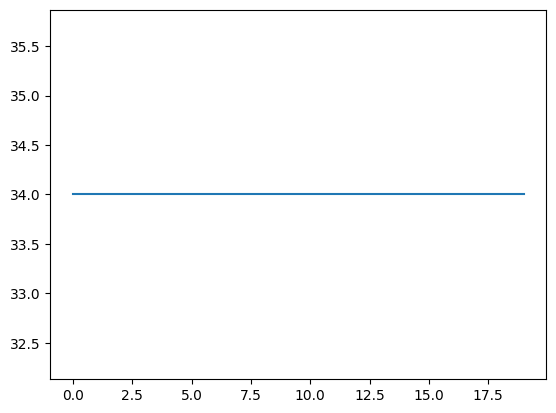

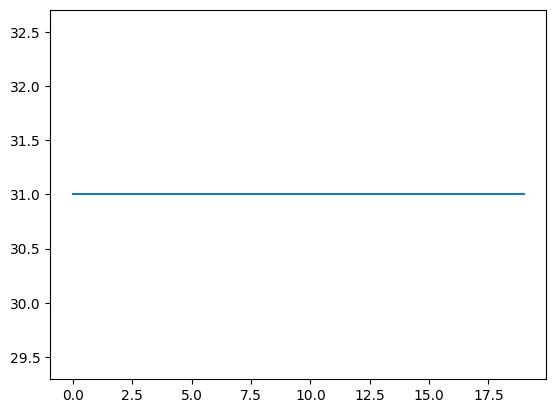

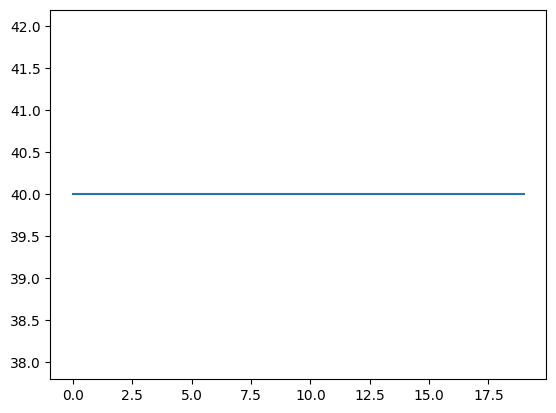

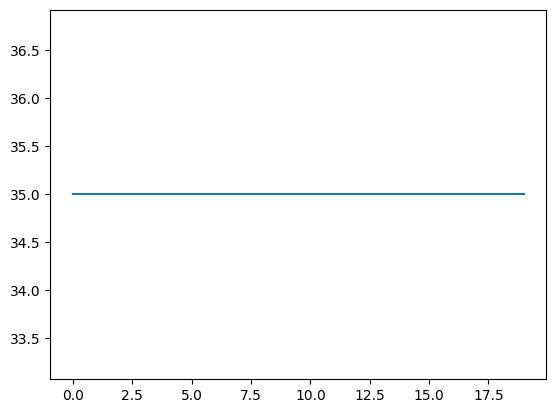

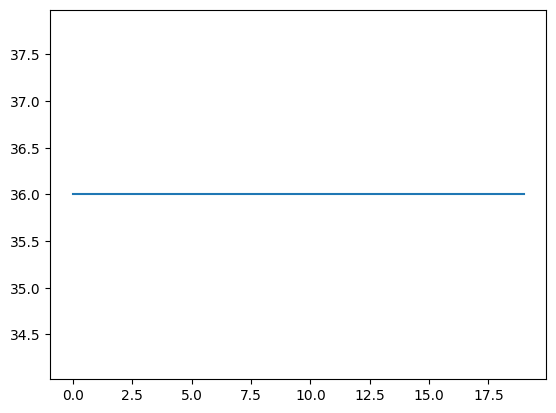

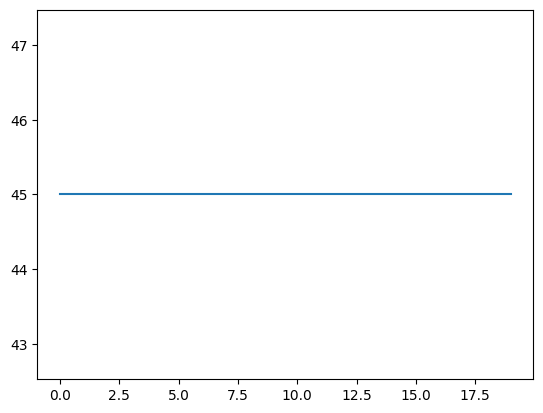

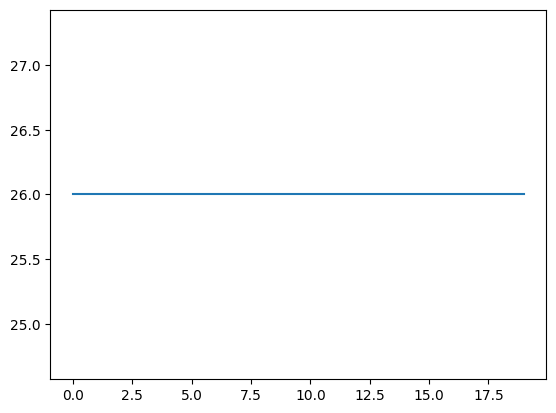

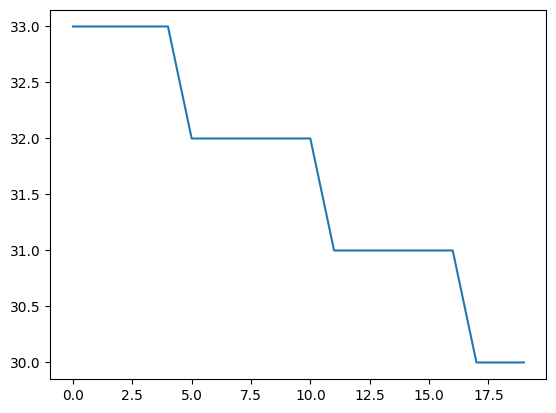

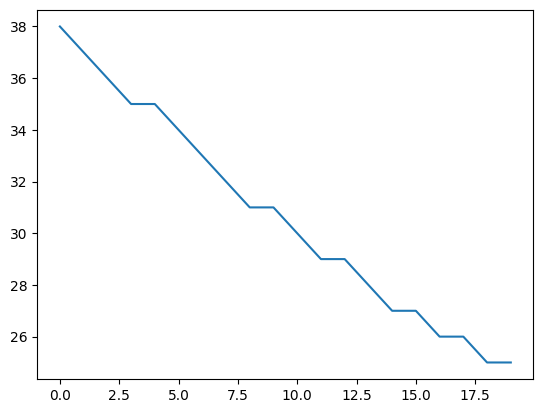

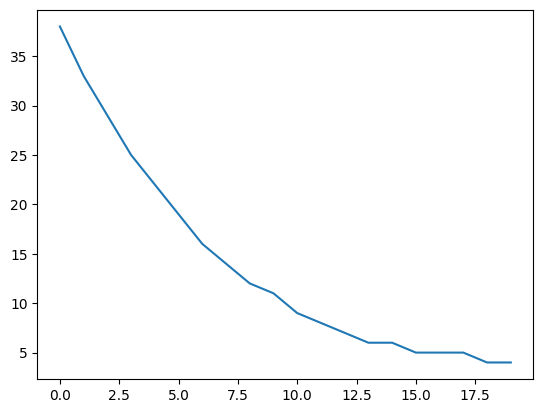

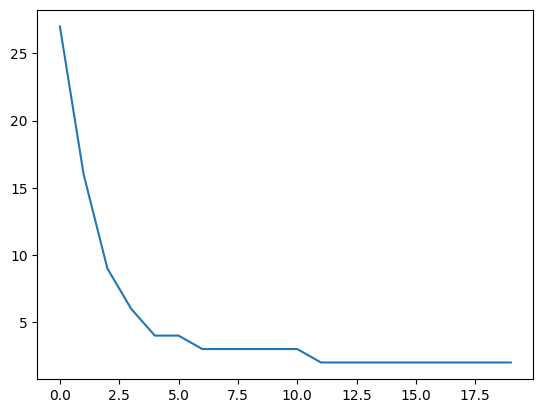

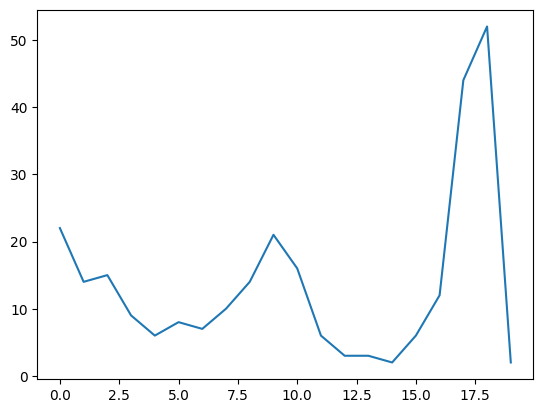

<ipython-input-389-1e8f728c57ab>:21: RuntimeWarning: invalid value encountered in multiply
  a_g = (backproped_gradient * relu_prime) # B*input_dim


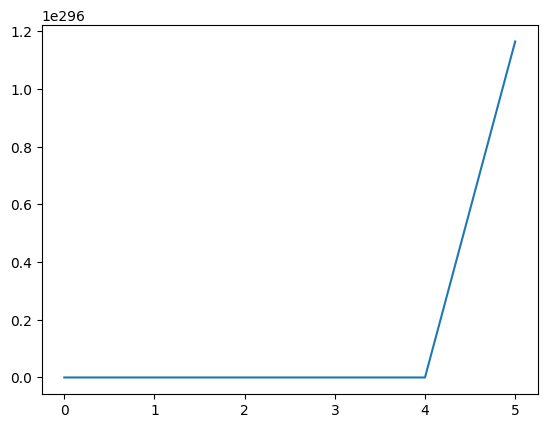

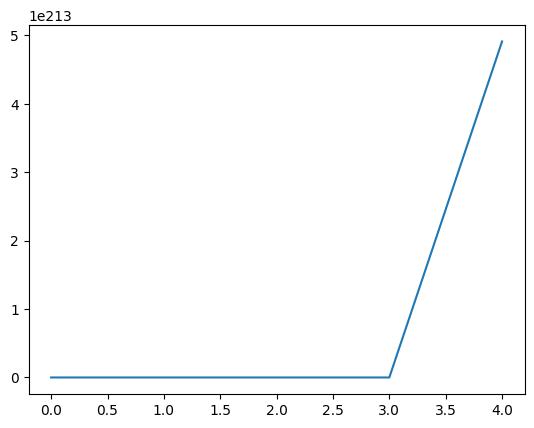

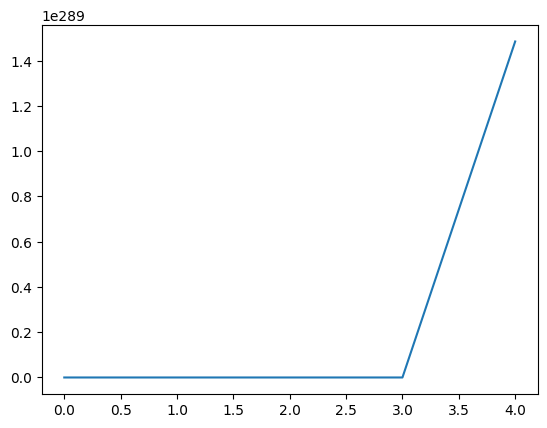

In [397]:
for rate in learning_rates:
  plottt(rate)

In [398]:
learning_rates

[1e-08,
 4.393970560760795e-08,
 1.9306977288832497e-07,
 8.483428982440726e-07,
 3.727593720314938e-06,
 1.6378937069540647e-05,
 7.196856730011529e-05,
 0.00031622776601683794,
 0.001389495494373139,
 0.006105402296585339,
 0.026826957952797274,
 0.1178768634793589,
 0.5179474679231223,
 2.275845926074791,
 10.0]

In [399]:
print('best lr are: ', learning_rates[7], learning_rates[8], learning_rates[9], learning_rates[10])

best lr are:  0.00031622776601683794 0.001389495494373139 0.006105402296585339 0.026826957952797274


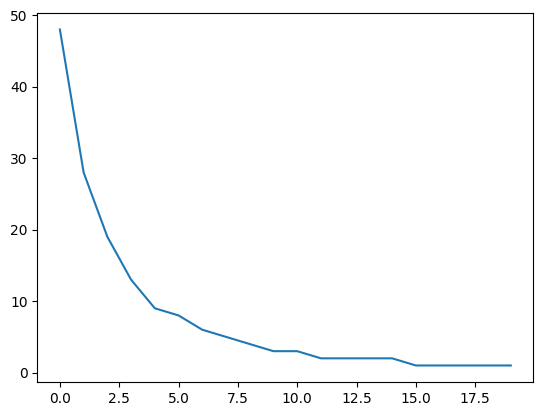

In [400]:
nn = plottt(learning_rates[10])

In [401]:
# @title testing
test_x = test.drop('quality', axis=1)

test_y = test['quality']

In [402]:
def comp_confmat(actual, predicted):

    # extract the different classes
    classes = np.unique(actual)

    # initialize the confusion matrix
    confmat = np.zeros((len(classes), len(classes)))

    # loop across the different combinations of actual / predicted classes
    for i in range(len(classes)):
        for j in range(len(classes)):

           # count the number of instances in each combination of actual / predicted classes
           confmat[i, j] = np.sum((actual == classes[i]) & (abs(predicted - classes[j])<0.5))

    return confmat

In [403]:
pred = nn.forward(test_x)
pred = pred.reshape(len(test_y))
loss = mean_squared_error(test_y, pred)
print(loss)

cm = comp_confmat(test_y, pred)

1.0


In [404]:
from operator import truediv

tp = np.diag(cm)
prec = list(map(truediv, tp, np.sum(cm, axis=0)))
rec = list(map(truediv, tp, np.sum(cm, axis=1)))
print ('Precision: {}\nRecall: {}'.format(prec, rec))

Precision: [0.0, 0.0, 0.5104166666666666, 0.391304347826087, 0.35714285714285715, 0.0]
Recall: [0.0, 0.0, 0.5833333333333334, 0.2872340425531915, 0.35714285714285715, 0.0]


In [405]:
f1 = []
for i in range(len(prec)):
  res = 0
  if not ((prec[i]+rec[i])==0):
    res = 2*((prec[i]*rec[i])/(prec[i]+rec[i]))
  f1.append(res)

print('f1', f1)

f1 [0, 0, 0.5444444444444445, 0.3312883435582822, 0.35714285714285715, 0]


In [406]:
cm

array([[ 0.,  0.,  0.,  1.,  0.,  0.],
       [ 0.,  0.,  6.,  2.,  0.,  0.],
       [ 1.,  5., 49., 26.,  3.,  0.],
       [ 2., 11., 37., 27., 15.,  2.],
       [ 0.,  3.,  4., 10., 10.,  1.],
       [ 0.,  0.,  0.,  3.,  0.,  0.]])

In [407]:
print('accuracy', np.sum(np.diag(cm))/pred.shape[0])

accuracy 0.3926940639269406


## activation functions

In [408]:
import torch as torch

In [409]:
vec = torch.randn(1000)

In [410]:
vec

tensor([ 1.7309e+00, -2.1581e-02,  1.6614e+00, -1.4631e+00,  5.3299e-01,
        -8.3719e-01, -5.0745e-01, -5.1544e-02, -4.1506e-02, -1.7656e+00,
        -1.0311e+00,  1.0078e+00,  1.2534e+00, -4.0972e-01,  3.3262e-01,
        -2.5783e-01,  1.8181e-01,  1.5579e+00, -1.4935e+00, -1.0048e+00,
        -5.6430e-01, -6.8888e-01, -1.7781e+00,  2.0131e+00, -3.0631e-01,
         4.8882e-01,  5.3972e-01, -1.0954e+00,  9.0822e-01,  1.0560e+00,
         1.2269e+00,  1.0053e+00, -1.1526e-01,  1.5322e+00, -1.7248e+00,
         3.3076e-01,  3.0605e-01, -2.5670e-01,  1.1701e+00,  8.8817e-01,
        -4.5955e-01, -3.1706e-01, -1.0321e+00, -4.7849e-01,  9.7667e-01,
         1.5356e+00,  3.1803e-01, -1.7091e+00,  1.1321e+00, -3.1235e-01,
         6.3283e-01,  4.9986e-01,  1.2534e-01,  2.1512e+00,  7.7797e-01,
        -1.2955e-01, -7.9228e-01,  3.7873e-01, -6.6820e-02, -9.6613e-02,
         6.9002e-01, -1.4877e+00, -4.2863e-01,  8.8411e-01, -6.2464e-01,
         1.2913e-01,  7.8303e-01,  2.5724e-01, -6.3

(array([  4.,   1.,  15.,  15.,  28.,  46.,  99.,  92., 127., 108., 114.,
        102.,  83.,  65.,  46.,  24.,  21.,   5.,   4.,   1.]),
 array([-3.07990623, -2.76511168, -2.45031691, -2.13552237, -1.82072759,
        -1.50593305, -1.19113839, -0.87634367, -0.56154907, -0.24675439,
         0.06804025,  0.38283491,  0.69762957,  1.01242423,  1.32721889,
         1.64201355,  1.95680809,  2.27160287,  2.58639741,  2.90119219,
         3.21598673]),
 <BarContainer object of 20 artists>)

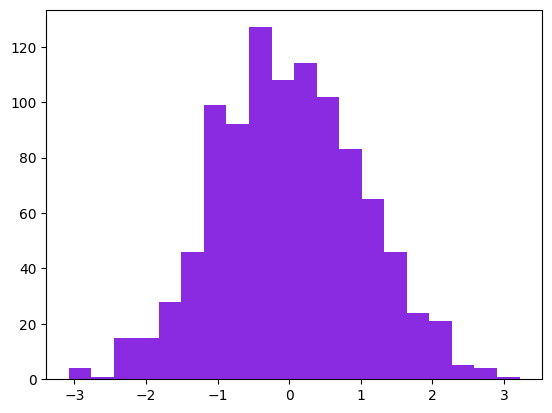

In [411]:
import matplotlib.pyplot as plt

plt.hist(vec, bins = 20, color = 'blueviolet')

In [412]:
import seaborn as sns
import numpy as np

In [413]:
def calculate_output_and_gradients(func, inputs):
  func_output = []
  for i in inputs:
    func_output.append(func.subs(x, i))
  func_diff = s.diff(func, x)
  func_diff_output = []
  for i in inputs:
    func_diff_output.append(func_diff.subs(x, i))

  outputs = np.array(func_output, dtype = 'float')
  gradients = np.array(func_diff_output, dtype = 'float')

  fig, axs = plt.subplots(2, 2)
  axs[0,0].hist(outputs ,bins = 20, color = 'blueviolet')
  axs[0,0].title.set_text('distribution of function\'s outputs')
  axs[0,1].hist(gradients ,bins = 20, color = 'blueviolet')
  axs[0,1].title.set_text('distribution of function\'s gradients')
  axs[1,0].plot(inputs, outputs, 'ro')
  axs[1,0].title.set_text('activation function')
  axs[1,1].plot(inputs, gradients, 'ro')
  axs[1,1].title.set_text('activation function\'s gradient')
  plt.tight_layout()

In [414]:
import sympy as s
x = s.symbols('x')

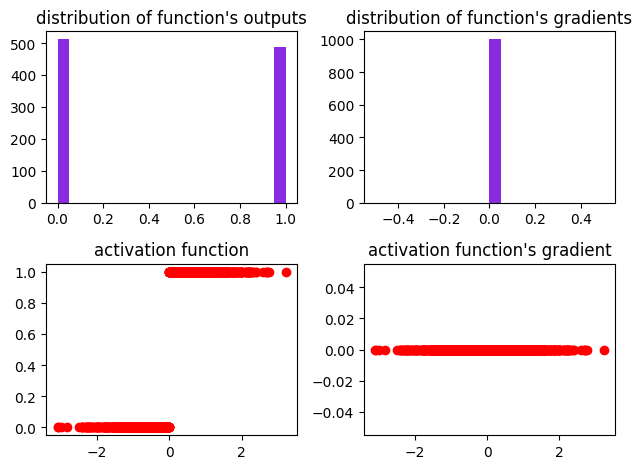

In [415]:
binary_step = s.Piecewise((1, x >= 0), (0, x < 0))
calculate_output_and_gradients(binary_step, vec)

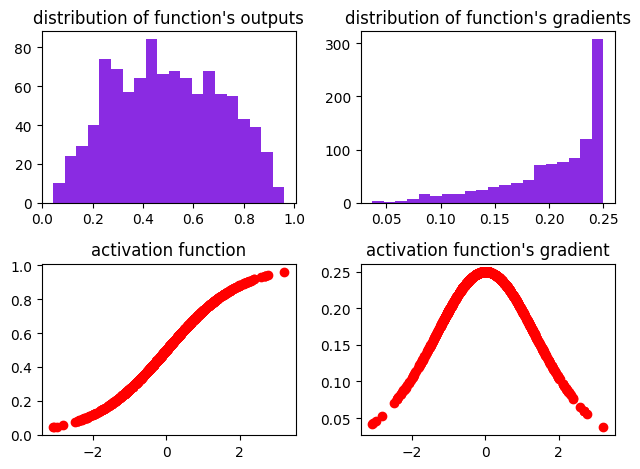

In [416]:
sigmoid = 1/(s.exp(-x) + 1)
calculate_output_and_gradients(sigmoid, vec)

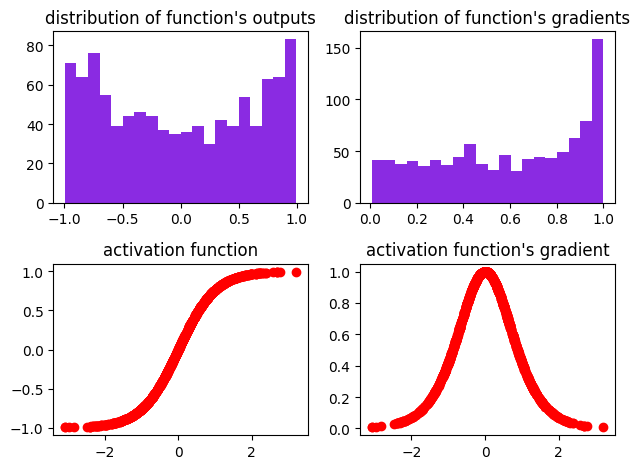

In [417]:
tanh = s.tanh(x)
calculate_output_and_gradients(tanh, vec)

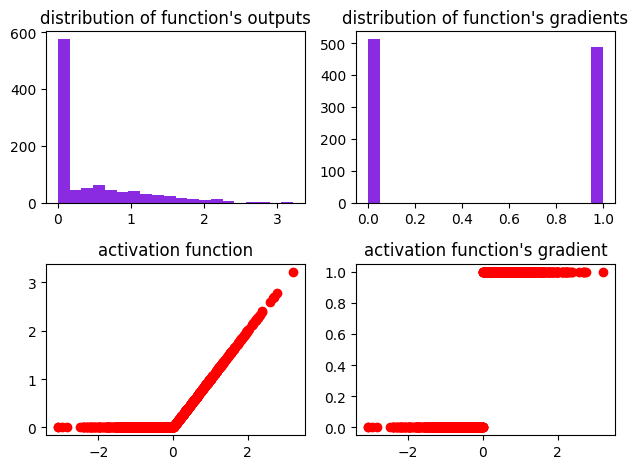

In [418]:
relu = s.Max(x, 0)
calculate_output_and_gradients(relu, vec)

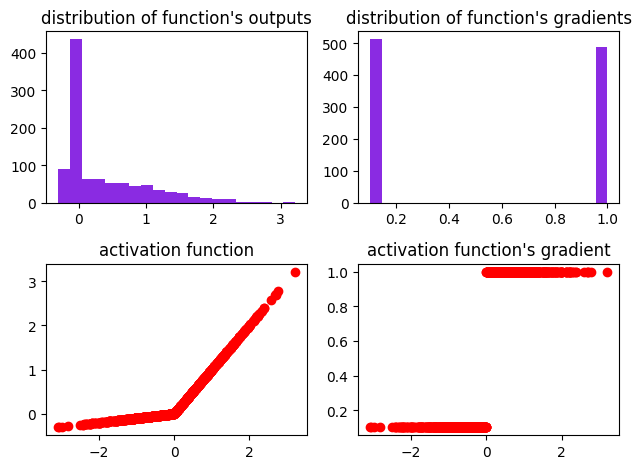

In [419]:
leaky_relu = s.Max(0.1*x, x)
calculate_output_and_gradients(leaky_relu, vec)

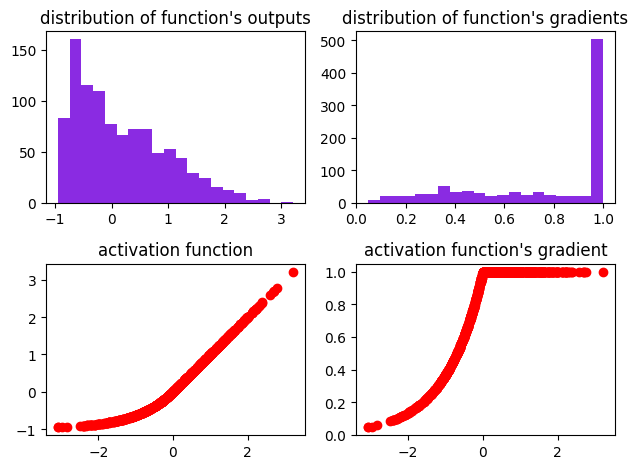

In [420]:
alpha = 1
elu = s.Piecewise((x,x>=0),(alpha * (s.exp(x) - 1),x<0))
calculate_output_and_gradients(elu, vec)

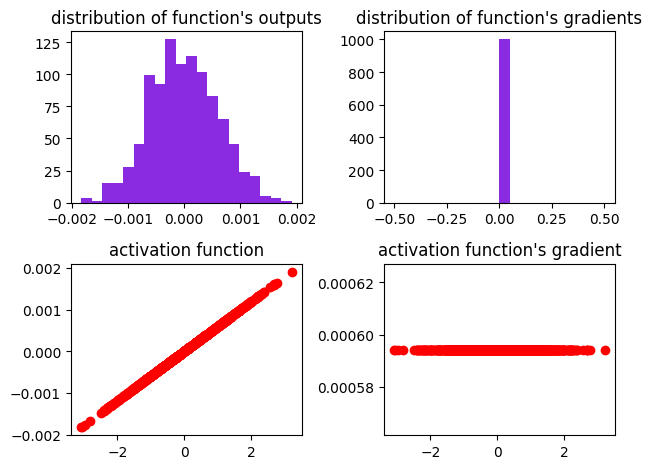

In [421]:
sum = 0
for i in vec:
  sum += s.exp(i)

softmax = x / sum
calculate_output_and_gradients(softmax, vec)

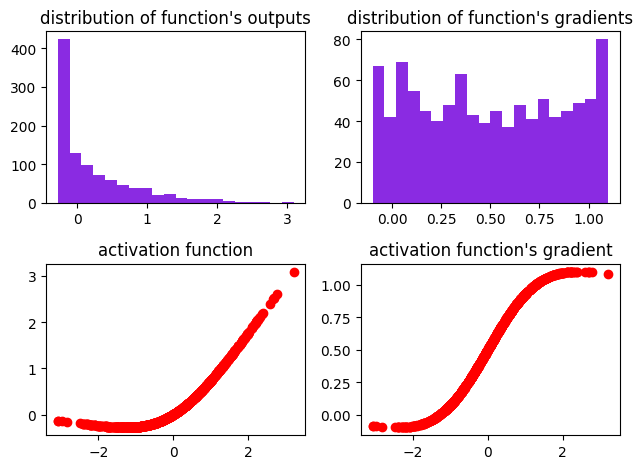

In [422]:
swish = x * sigmoid
calculate_output_and_gradients(swish, vec)

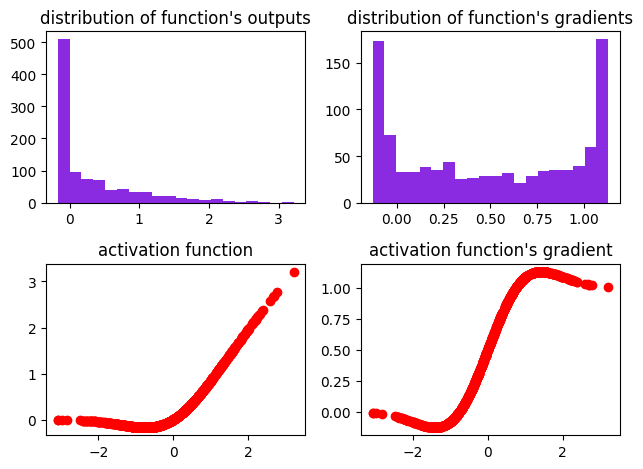

In [423]:
gelu = (0.5 * x) * (1 + s.tanh(s.sqrt(2 / s.pi)*(x + 0.044715 * x**3)))
calculate_output_and_gradients(gelu, vec)

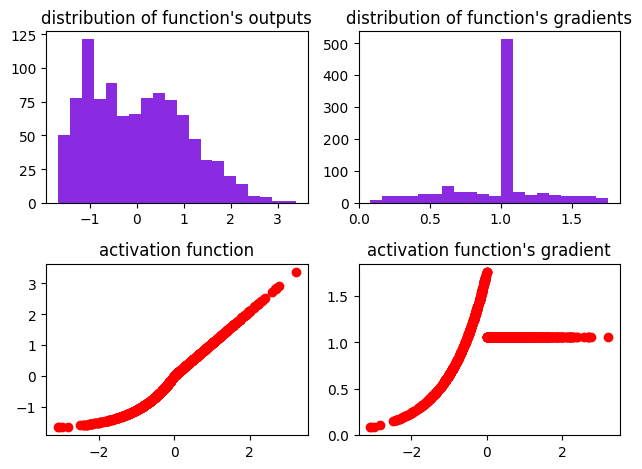

In [424]:
lambda_ = 1.0507
alpha = 1.6733
selu = s.Piecewise((lambda_ * x, x>=0), (lambda_*alpha*(s.exp(x)-1), x<0))
calculate_output_and_gradients(selu, vec)